# 2.6 概率

In [1]:
#概率是一种灵活的语言，用于说明我们的确定程度，并且它可以有效地应用于广泛的领域中

## 2.6.1 基本概率论

In [2]:
#导入必要的包
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

D:\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
D:\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
D:\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [3]:
#把从概率分布中抽取样本的过程成为抽样，笼统来说可以把分布看作是对事件的概率分配
#将概率分配给一些离散选择的分布成为多项分布

#为了抽取一个样本，即掷骰子，我们只需传入一个概率向量。输出是另一个相同长度的向量：它在索引i处的值是采样结果中i出现的次数
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([1., 0., 0., 0., 0., 0.])

In [4]:
#用深度学习框架的函数同时抽取多个样本，得到想要的任意形状的独立样本数组
multinomial.Multinomial(10, fair_probs).sample()

tensor([3., 1., 1., 3., 2., 0.])

In [5]:
#现在我们知道如何对骰子进行采样，我们可以模拟1000次投掷。然后可以统计1000次投掷后，每个数字被投中了多少次。
#具体来说可以计算相对频率，以作真实概率的估计

# 将结果存储为32位浮点数以进行除法
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 10000 #相对皮v率作为估计值

tensor([0.0160, 0.0151, 0.0160, 0.0184, 0.0178, 0.0167])

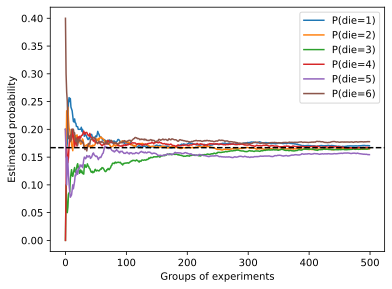

In [6]:
#我们也可以看到这些概率如何随着时间的推移收敛到真实概率，让我们进行500组实验，每组抽10个样本
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(), label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend();

#每条实线对应于骰子的6个值中的一个，并给出骰子在每组实验后出现值得估计概率
#当我们通过更多得实验获得更多的数据时，这6条实体曲线向真实概率收敛

### 2.6.1.1 概率论公理

### 2.6.1.2 随机变量

## 2.6.2 处理多个随机变量

### 2.6.2.1 联合概率

In [7]:
#a和b都发生的概率

### 2.6.2.2 条件概率

In [8]:
#a发生的条件下b发生的概率

### 2.6.2.3 贝叶斯定理

#### $$P(A, B) = P(B | A)P(A)=P(A | B)P(B)$$
#### 贝叶斯定理：$$P(A | B) = \frac{P(B | A)P(A)}{P(B)} $$
#### P(A,B)是一个联合分布，P(A|B)是一个条件分布。

### 2.6.2.4 边际化

#### 为了能进行事件概率求和，我们需要求和法则，B的概率相当于计算A的所有可能选择，并将所有选择的联合概率聚在一起
$$ P(B) = \sum_{A}P(A, B) $$
#### 这也称为边际化，边际化结果的概率或分布称为边际概率或边际分布

### 2.6.2.5 独立性

In [9]:
#如果两个随机变量A和B是独立的，意味着事件A的发生跟B事件的发生无关。
#其他情况下说明A和B依赖

### 2.6.2.6 应用

## 2.6.3 期望和方差

In [10]:
#随机变量与期望的偏置可以用方差来量化，方差的平方根称为标准差

## 2.6.4 小结

In [11]:
#我们额可以从概率分布中采样
#我们可以使用联合分布、条件分别、Bayes定理、边缘化和独立性假设来分析多个随机变量
#期望和方差为概率分布的关键特征的概括提供了实用的度量形式

## 2.6.5 练习

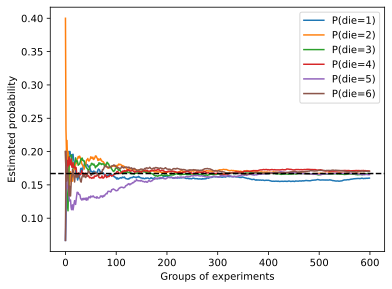

In [12]:
#1.进行m=500组实验，每组抽取n=10个样本，改变m和n，观察和分析实验结果。
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l
fair_probs = torch.ones([6]) / 6
counts = multinomial.Multinomial(15, fair_probs).sample((600,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(), label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()

#实验次数越多，越接近分布结构

In [13]:
#2.给定两个概率为P(A)和P(B)的事件，计算P(A∪B)和P(A∩B)的上限和下限。

#P(A∪B)上限为1，下限为 max(P(A),P(B))
#P(A∩B)上限为 min(P(A),P(B))，下限为0

In [14]:
#3.假设我们有一系列随机变量，例如 A、B和 C,其中B只依赖于A，而C只依赖于B，你能简化联合概率P(A,B,C)吗？
#提示：这是一个隐马尔可夫链

#P(A, B) = P(B|A)P(A)
#P(A, B, C) = P(C|A, B)P(A, B) = P(C|B)P(B|A)P(A)

In [ ]:
#4.在 2.6.2.6节中，第一个测试更准确。为什么不运行第一个测试两次，而是同时运行第一个和第二个测试?

#不同类型测试有着不同的流程和判断标准，使用不同的测试更能排除实验结果偶然性。